In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df=df.set_index('CustomerID')

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df2=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
df['Gender']=preprocessing.LabelEncoder().fit_transform(df['Gender'])

In [9]:
df.iloc[:,0:]=MinMaxScaler().fit_transform(df.iloc[:,0:])

In [10]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.0,0.019231,0.000000,0.387755
2,1.0,0.057692,0.000000,0.816327
3,0.0,0.038462,0.008197,0.051020
4,0.0,0.096154,0.008197,0.775510
5,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
196,0.0,0.326923,0.860656,0.795918
197,0.0,0.519231,0.909836,0.275510
198,1.0,0.269231,0.909836,0.744898


## KMeans

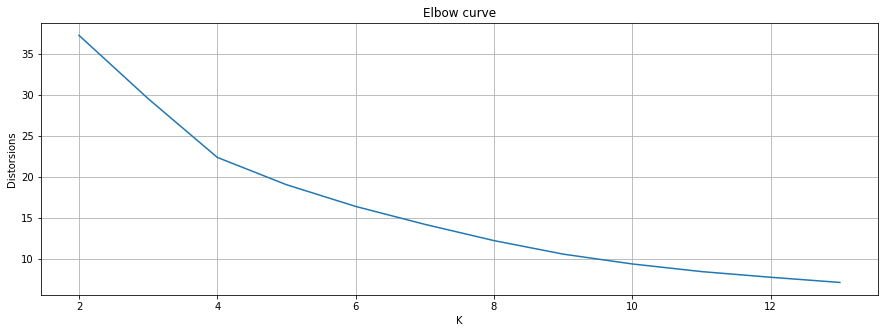

In [11]:
distorsions = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 14), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.010270367629382915
For n_clusters = 3 The average silhouette_score is : -0.01472820368386457
For n_clusters = 4 The average silhouette_score is : 0.0044170353164214755
For n_clusters = 5 The average silhouette_score is : 0.007056108636517049
For n_clusters = 6 The average silhouette_score is : 0.029618196789339316
For n_clusters = 7 The average silhouette_score is : 0.034293957895339594
For n_clusters = 8 The average silhouette_score is : 0.008490786529963244
For n_clusters = 9 The average silhouette_score is : 0.031357981372357104
For n_clusters = 10 The average silhouette_score is : 0.0467563706444424
For n_clusters = 11 The average silhouette_score is : 0.04237437738282324
For n_clusters = 12 The average silhouette_score is : 0.0496319589099362
For n_clusters = 13 The average silhouette_score is : 0.023624787837174036


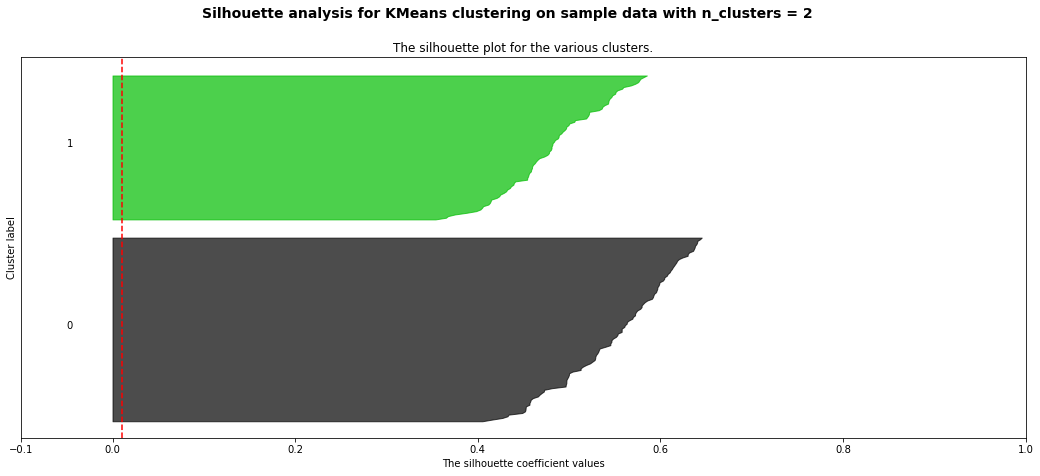

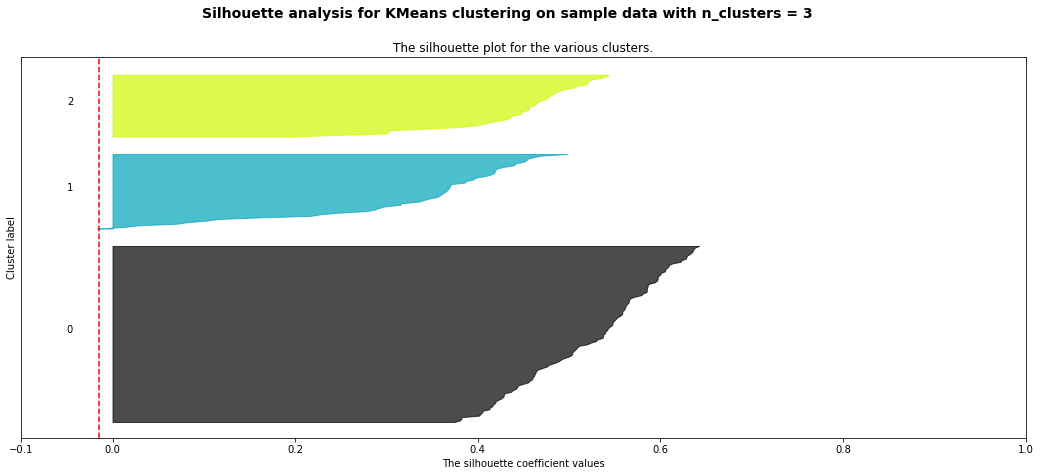

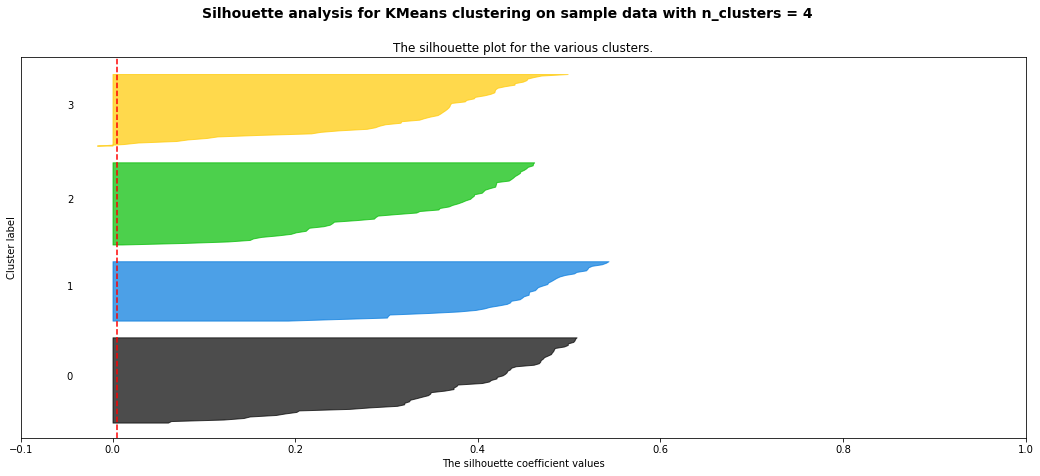

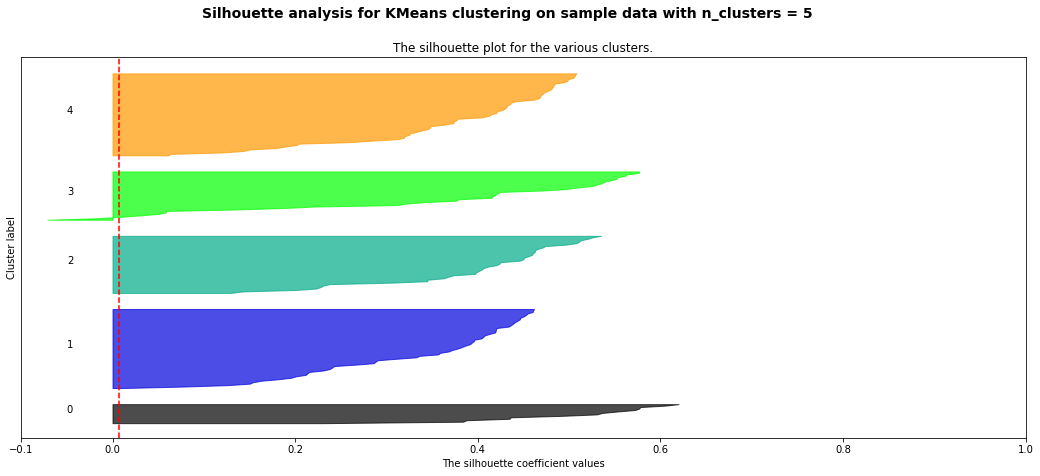

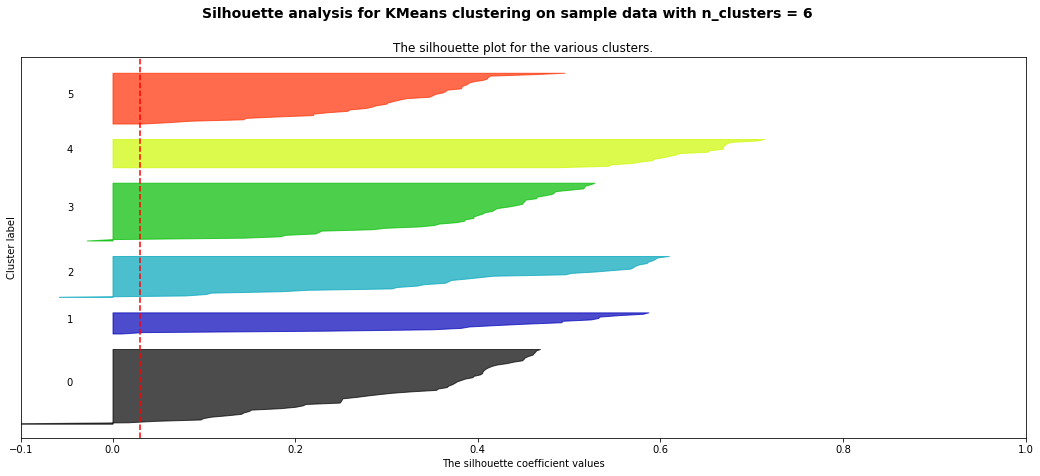

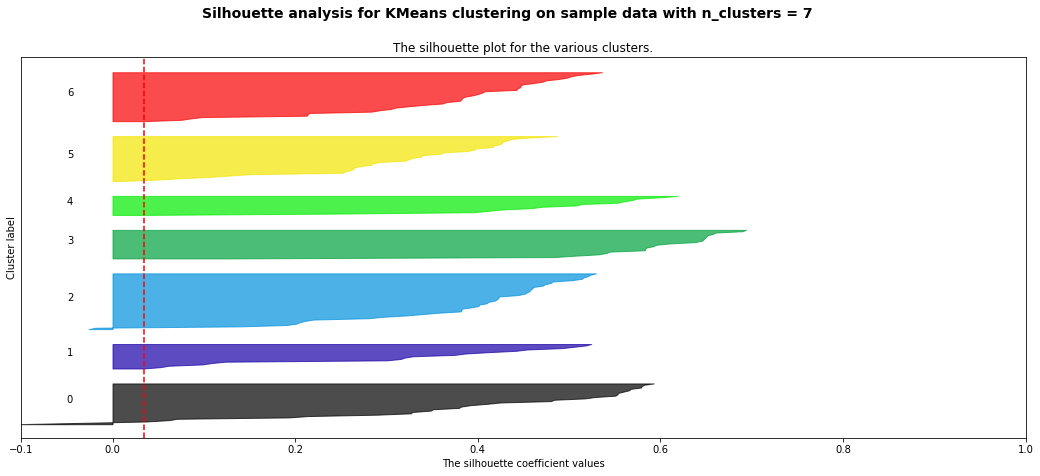

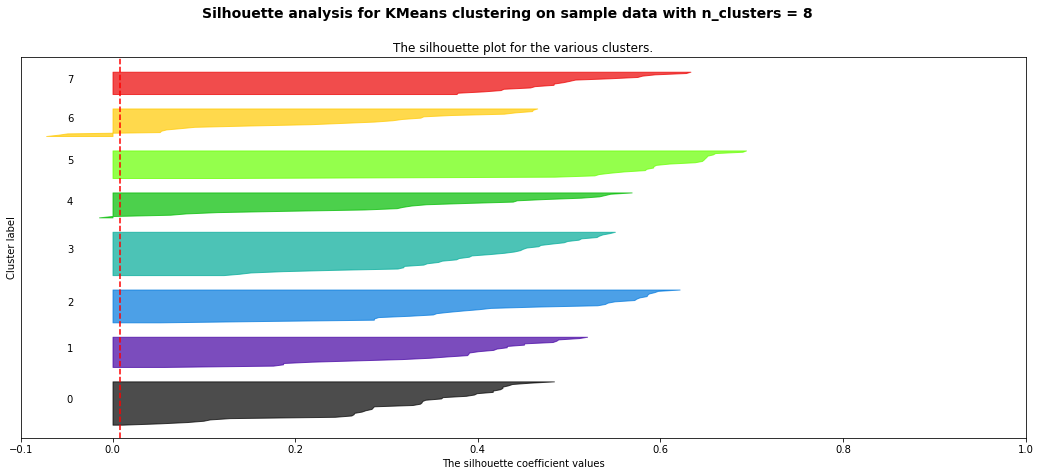

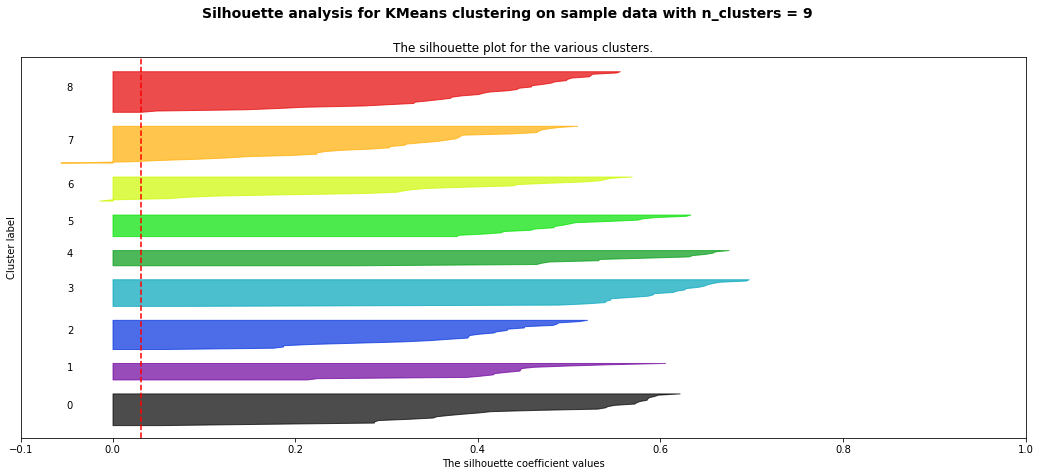

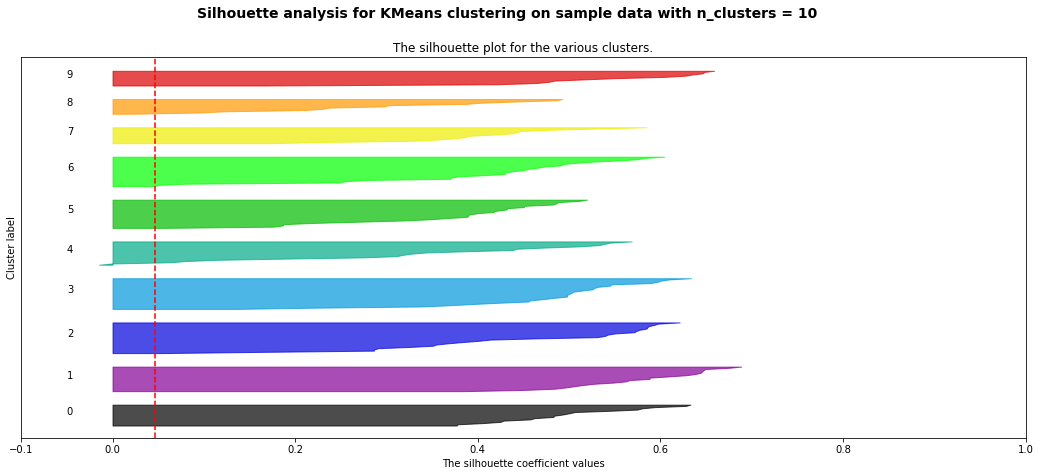

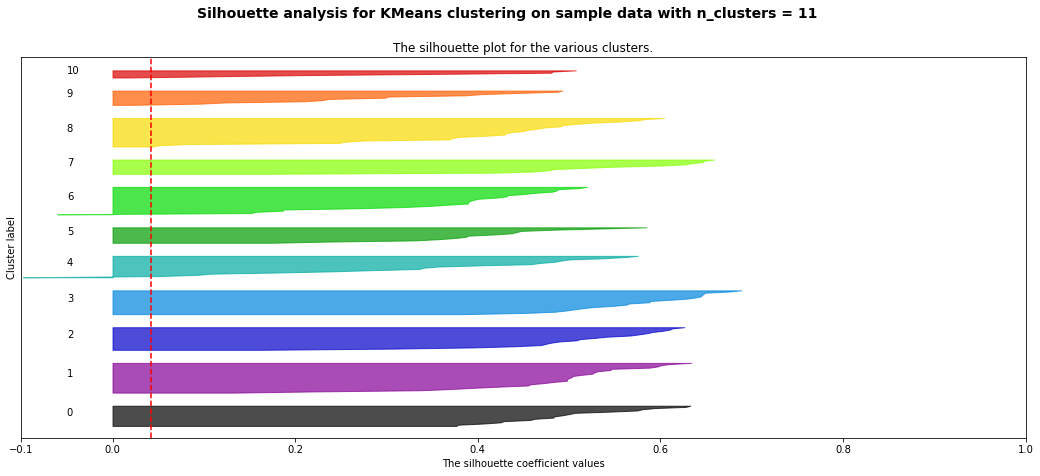

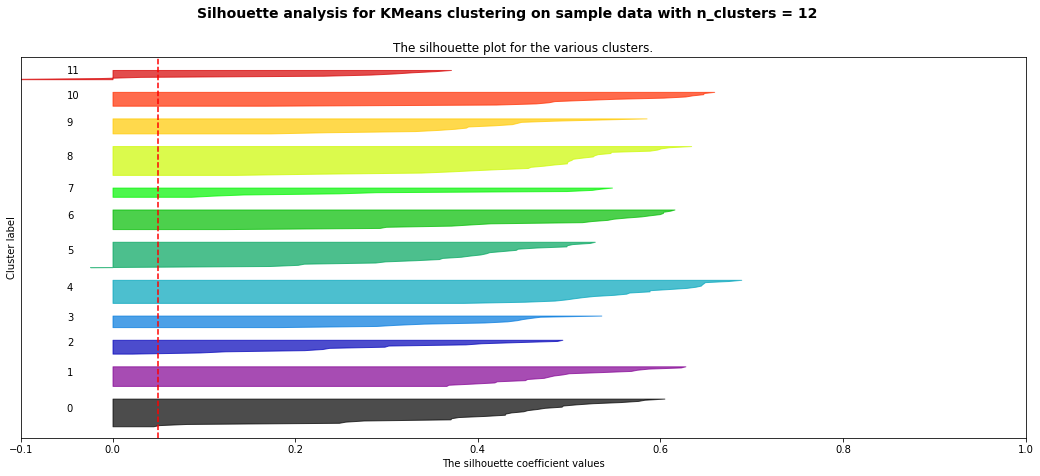

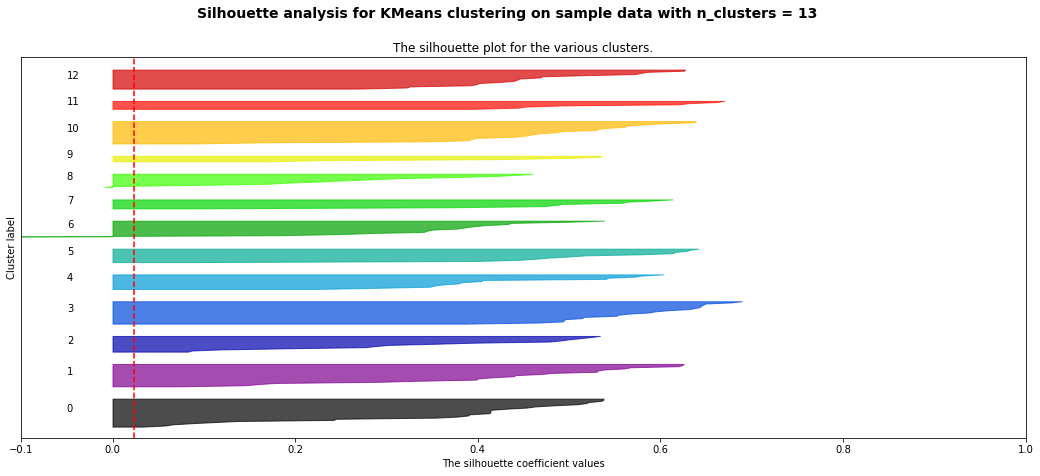

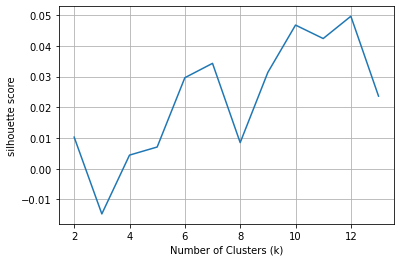

In [12]:
range_n_clusters = list(range(2,14))
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df.iloc[:,1:], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.grid()
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [13]:
km=KMeans(n_clusters=7)

In [14]:
km.fit(df)

KMeans(n_clusters=7)

In [15]:
km_pred=km.predict(df)

In [16]:
 df['KMeans_Cluster']=km_pred
df2['KMeans_Cluster']=km_pred

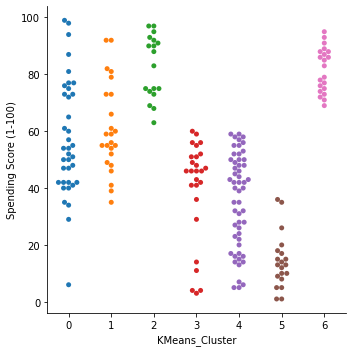

In [17]:
sns.catplot(data=df2,x='KMeans_Cluster',y='Spending Score (1-100)',kind='swarm')

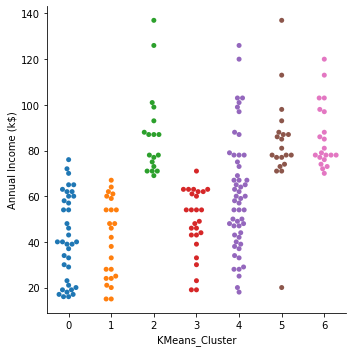

In [18]:
sns.catplot(data=df2,x='KMeans_Cluster',y='Annual Income (k$)',kind='swarm')

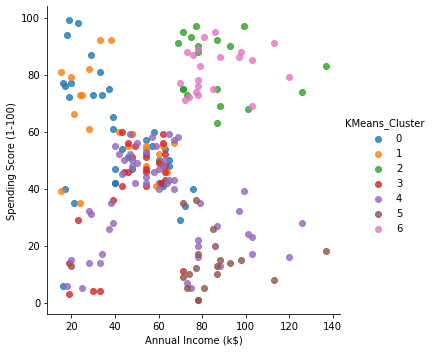

In [19]:
sns.lmplot(data=df2,y='Spending Score (1-100)',hue='KMeans_Cluster',x='Annual Income (k$)',fit_reg=False)

In [20]:
X=df.iloc[:,:4]
y1=df.iloc[:,4]

In [21]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2,random_state=88)

In [22]:
log1=LogisticRegression()

In [23]:
log1.fit(X_train,y_train1)

LogisticRegression()

In [24]:
accuracy_score(y_test1,log1.predict(X_test))

0.975

In [25]:
log1.fit(X,y1)

LogisticRegression()

In [26]:
pd.DataFrame(log1.coef_,columns=list(df2.columns)[0:4])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-2.624066,-2.840956,-2.166934,-0.016785
1,2.242065,-2.295812,-2.028377,0.616908
2,1.998135,-0.431998,1.848182,2.556406
3,2.017162,3.289946,-1.275123,-0.500024
4,-3.269888,2.979422,0.056865,-2.222453
5,1.856319,-0.149343,1.492504,-3.035156
6,-2.219727,-0.551259,2.072883,2.601103


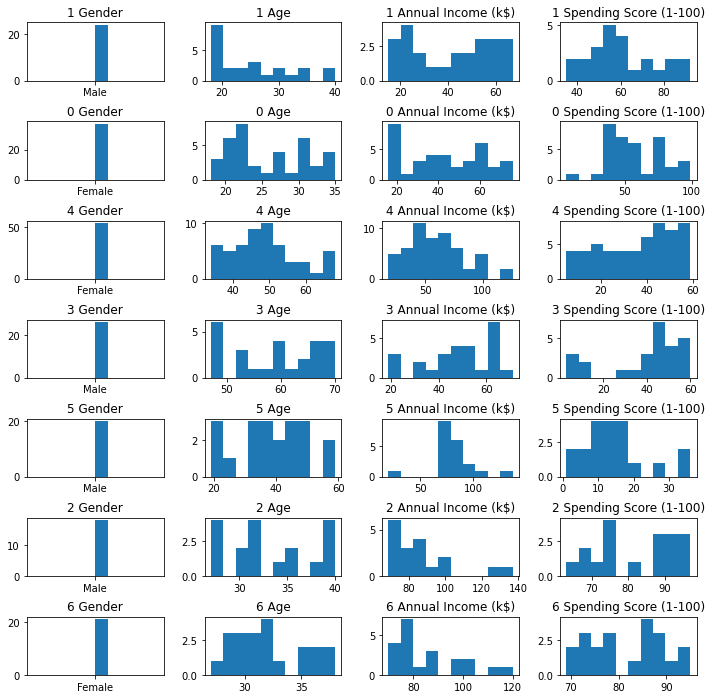

In [27]:
fig,ax=plt.subplots(len(df2['KMeans_Cluster'].unique()),4,figsize=(12,12))
for i in range(len(df2['KMeans_Cluster'].unique())):
    for j in range(0,4):
        ax[i,j].hist(df2[df2['KMeans_Cluster']==df2['KMeans_Cluster'].unique()[i]].iloc[:,j])
        ax[i,j].set_title(str(df2['KMeans_Cluster'].unique()[i])+' '+str(df2.columns[j]))
plt.subplots_adjust(wspace=0.3,hspace=0.7)

In [76]:
df2.loc[df2['KMeans_Cluster']==0,'KMeans_Cluster']='old,male,average income,high spending score'
df2.loc[df2['KMeans_Cluster']==1,'KMeans_Cluster']='middle-aged,female,high income,high spending score'
df2.loc[df2['KMeans_Cluster']==2,'KMeans_Cluster']='old,female,average income,average spending score'
df2.loc[df2['KMeans_Cluster']==3,'KMeans_Cluster']='young,male,low and average income,average spending score'
df2.loc[df2['KMeans_Cluster']==4,'KMeans_Cluster']='middle-aged,male,high income,high spending score'
df2.loc[df2['KMeans_Cluster']==5,'KMeans_Cluster']='young and middle-aged,male,average and high income,low spending score'
df2.loc[df2['KMeans_Cluster']==6,'KMeans_Cluster']='young,female,low and average income,average and high spending score'

In [29]:
df2['KMeans_Cluster'].unique()

array([1, 0, 4, 3, 5, 2, 6])

In [30]:
# We can see age and gender have high coefficients when predicting the likelihood of the cluster, followed by spending score and 
# then by annual income.

## Heirarchal

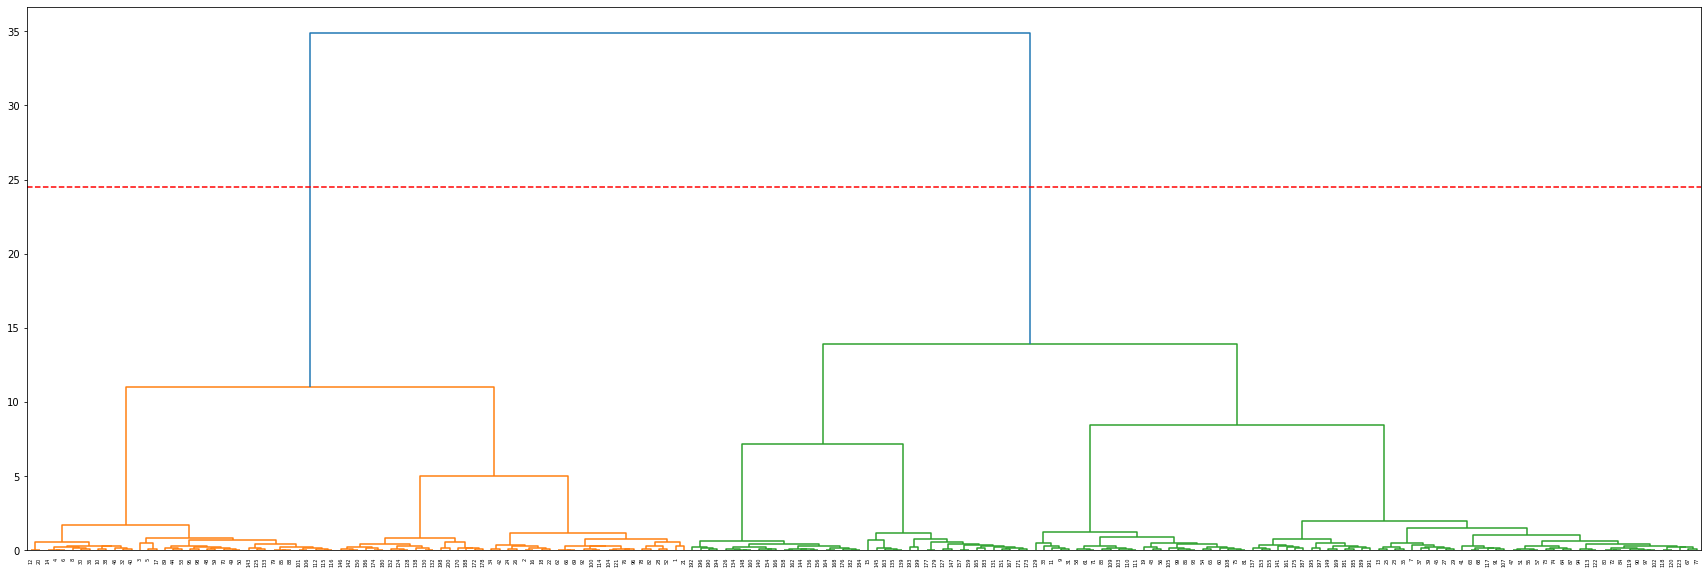

In [31]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=df.index)
plt.axhline(y=24.5, color='r', linestyle='--')

In [32]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(df.iloc[:,1:])

In [33]:
 df['Heirarchal_Cluster']=hc_pred
df2['Heirarchal_Cluster']=hc_pred

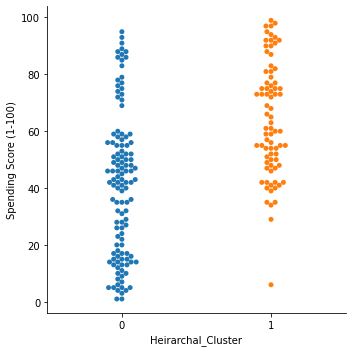

In [34]:
sns.catplot(data=df2,x='Heirarchal_Cluster',y='Spending Score (1-100)',kind='swarm')

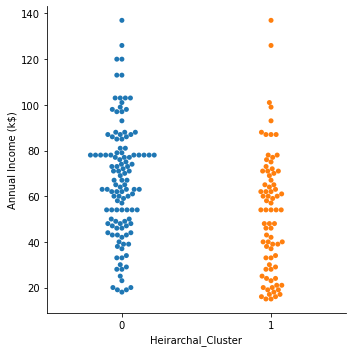

In [35]:
sns.catplot(data=df2,x='Heirarchal_Cluster',y='Annual Income (k$)',kind='swarm')

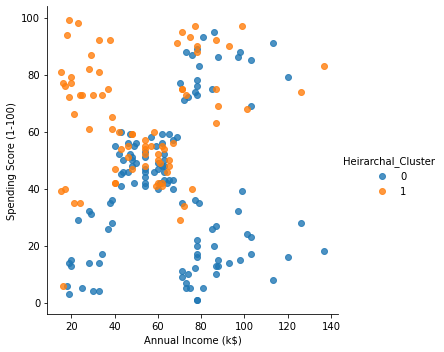

In [36]:
sns.lmplot(data=df2,y='Spending Score (1-100)',hue='Heirarchal_Cluster',x='Annual Income (k$)',fit_reg=False)

In [37]:
X=df.iloc[:,:4]
y2=df.iloc[:,5]

In [38]:
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2,random_state=88)

In [39]:
log2=LogisticRegression()

In [40]:
log2.fit(X_train,y_train2)

LogisticRegression()

In [41]:
accuracy_score(y_test2,log2.predict(X_test))

0.875

In [42]:
log2.fit(X,y2)

LogisticRegression()

In [43]:
y2.unique()

array([1, 0], dtype=int64)

In [44]:
pd.DataFrame(log2.coef_,columns=list(df2.columns)[0:4])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.046421,-4.604292,-2.289723,2.297968


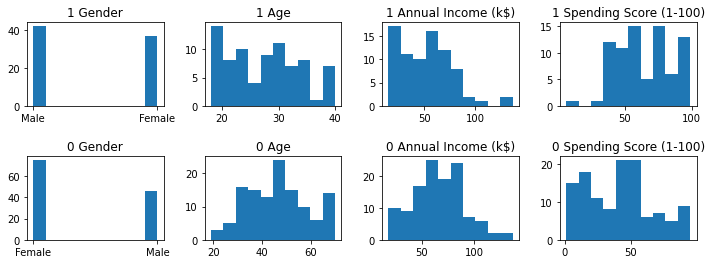

In [45]:
fig,ax=plt.subplots(len(df2['Heirarchal_Cluster'].unique()),4,figsize=(12,4))
for i in range(len(df2['Heirarchal_Cluster'].unique())):
    for j in range(0,4):
        ax[i,j].hist(df2[df2['Heirarchal_Cluster']==df2['Heirarchal_Cluster'].unique()[i]].iloc[:,j])
        ax[i,j].set_title(str(df2['Heirarchal_Cluster'].unique()[i])+' '+str(df2.columns[j]))
plt.subplots_adjust(wspace=0.3,hspace=0.6)

In [74]:
df2.loc[df2['Heirarchal_Cluster']==0,'Heirarchal_Cluster']='middle-aged,low and average income,average and high spending score'
df2.loc[df2['Heirarchal_Cluster']==1,'Heirarchal_Cluster']='young,average and high income,low and average spending score'

In [47]:
# We can see age has the highest coefficient when predicting the likelihood of the cluster,closely followed by spending 
# score and distantly followed then by annual income and then by gender.

## DBSCAN

In [48]:
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(df.iloc[:,:4])
distances, indices = nbrs.kneighbors(df.iloc[:,:4])

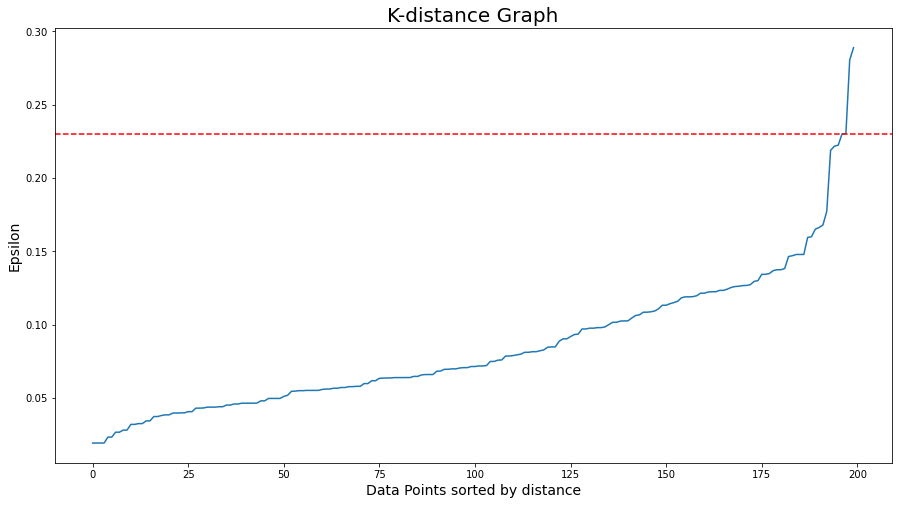

In [49]:
distances = np.sort(distances, axis=0)
plt.figure(figsize=(15,8))
plt.plot(distances[:,1])
plt.axhline(y=0.23, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [50]:
eps=0.23
for min_samples in list(range(2,20)):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.23 | min_samples=  2 | obtained clustering:  [(1, 4), (2, 81), (3, 109), (4, 4), (5, 2)]
eps= 0.23 | min_samples=  3 | obtained clustering:  [(1, 6), (2, 81), (3, 109), (4, 4)]
eps= 0.23 | min_samples=  4 | obtained clustering:  [(1, 8), (2, 79), (3, 109), (4, 4)]
eps= 0.23 | min_samples=  5 | obtained clustering:  [(1, 14), (2, 78), (3, 108)]
eps= 0.23 | min_samples=  6 | obtained clustering:  [(1, 15), (2, 77), (3, 108)]
eps= 0.23 | min_samples=  7 | obtained clustering:  [(1, 20), (2, 74), (3, 106)]
eps= 0.23 | min_samples=  8 | obtained clustering:  [(1, 25), (2, 10), (3, 101), (4, 38), (5, 26)]
eps= 0.23 | min_samples=  9 | obtained clustering:  [(1, 37), (2, 99), (3, 39), (4, 25)]
eps= 0.23 | min_samples=  10 | obtained clustering:  [(1, 47), (2, 94), (3, 25), (4, 26), (5, 8)]
eps= 0.23 | min_samples=  11 | obtained clustering:  [(1, 61), (2, 91), (3, 24), (4, 11), (5, 13)]
eps= 0.23 | min_samples=  12 | obtained clustering:  [(1, 73), (2, 90), (3, 24), (4, 13)]
eps= 0.23 

In [51]:
dbscan=DBSCAN(eps=0.23,min_samples=10)
dbscan.fit(df.iloc[:,:4])

DBSCAN(eps=0.23, min_samples=10)

In [52]:
dbscan_pred=dbscan.labels_

In [53]:
 df['DBSCAN_Cluster']=dbscan_pred
df2['DBSCAN_Cluster']=dbscan_pred

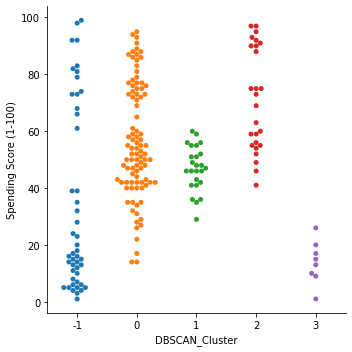

In [54]:
sns.catplot(data=df2,x='DBSCAN_Cluster',y='Spending Score (1-100)',kind='swarm')

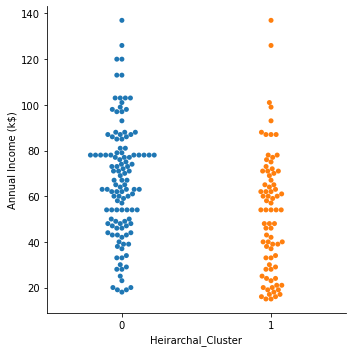

In [55]:
sns.catplot(data=df2,x='Heirarchal_Cluster',y='Annual Income (k$)',kind='swarm')

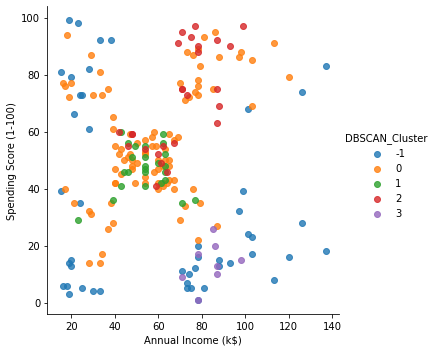

In [56]:
sns.lmplot(data=df2,y='Spending Score (1-100)',hue='DBSCAN_Cluster',x='Annual Income (k$)',fit_reg=False)

In [57]:
X=df.iloc[:,:4]
y3=df.iloc[:,6]

In [58]:
X_train, X_test, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.2,random_state=88)

In [59]:
log3=LogisticRegression()

In [60]:
log3.fit(X_train,y_train2)

LogisticRegression()

In [61]:
log3.fit(X,y3)

LogisticRegression()

In [62]:
pd.DataFrame(log3.coef_,columns=list(df.columns)[0:4])

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-0.341301,-0.733796,-0.195367,-1.796142
1,-4.085852,-0.446524,-0.953271,1.522137
2,1.711177,2.605471,-0.603537,0.333939
3,1.655390,-1.619024,0.770374,1.732476
4,1.060586,0.193873,0.981802,-1.792411


In [63]:
log3.predict(X_test)

array([ 2,  0, -1,  0,  0, -1,  2,  1,  1,  0,  2,  1,  0,  0,  0,  2,  0,
        0, -1,  0,  1, -1,  0,  0,  1, -1,  0, -1,  2,  0,  2,  0, -1,  0,
        0,  0,  1, -1, -1,  1], dtype=int64)

In [64]:
y3.unique()

array([-1,  0,  1,  2,  3], dtype=int64)

In [65]:
df['Spend_Rate']=df['Spending Score (1-100)']/df['Annual Income (k$)']
df2['Spend_Rate']=df['Spending Score (1-100)']/df['Annual Income (k$)']

In [66]:
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Heirarchal_Cluster,DBSCAN_Cluster,Spend_Rate
CustomerID,,,,,,,,
1,Male,19,15,39,1,1,-1,inf
2,Male,21,15,81,1,1,-1,inf
3,Female,20,16,6,0,1,-1,6.224490
4,Female,23,16,77,0,1,0,94.612245
5,Female,31,17,40,0,1,0,24.275510
...,...,...,...,...,...,...,...,...
196,Female,35,120,79,6,0,0,0.924781
197,Female,45,126,28,4,0,-1,0.302813
198,Male,32,126,74,2,1,-1,0.818717


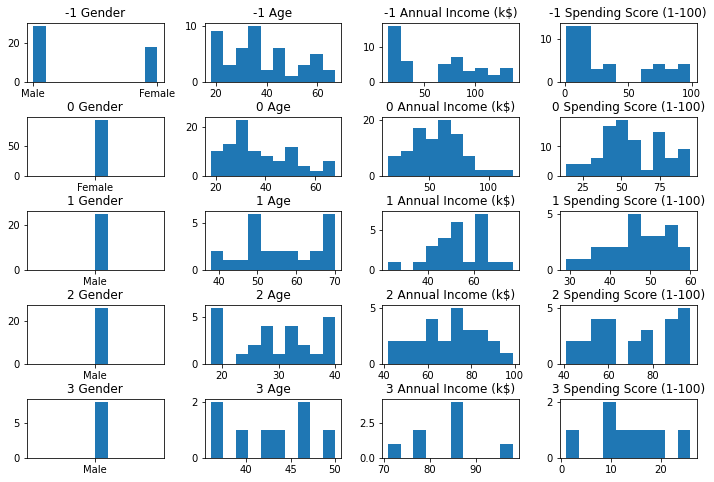

In [67]:
fig,ax=plt.subplots(len(df2['DBSCAN_Cluster'].unique()),4,figsize=(12,8))
for i in range(len(df2['DBSCAN_Cluster'].unique())):
    for j in range(0,4):
        ax[i,j].hist(df2[df2['DBSCAN_Cluster']==df2['DBSCAN_Cluster'].unique()[i]].iloc[:,j])
        ax[i,j].set_title(str(df2['DBSCAN_Cluster'].unique()[i])+' '+str(df2.columns[j]))
plt.subplots_adjust(wspace=0.3,hspace=0.6)

In [72]:
df2.loc[df2['DBSCAN_Cluster']==0,'DBSCAN_Cluster']='young,female,average income,average and high spending score'
df2.loc[df2['DBSCAN_Cluster']==1,'DBSCAN_Cluster']='old,male,average income,average spending score'
df2.loc[df2['DBSCAN_Cluster']==2,'DBSCAN_Cluster']='young and middle-aged,male,average and high income,average and high spending score'
df2.loc[df2['DBSCAN_Cluster']==3,'DBSCAN_Cluster']='middle-aged,male,high income,low spending score'
df2.loc[df2['DBSCAN_Cluster']==-1,'DBSCAN_Cluster']='Outliers'

In [77]:
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Heirarchal_Cluster,DBSCAN_Cluster,Spend_Rate
CustomerID,,,,,,,,
1,Male,19,15,39,"middle-aged,female,high income,high spending s...","young,average and high income,low and average ...",Outliers,inf
2,Male,21,15,81,"middle-aged,female,high income,high spending s...","young,average and high income,low and average ...",Outliers,inf
3,Female,20,16,6,"old,male,average income,high spending score","young,average and high income,low and average ...",Outliers,6.224490
4,Female,23,16,77,"old,male,average income,high spending score","young,average and high income,low and average ...","young,female,average income,average and high s...",94.612245
5,Female,31,17,40,"old,male,average income,high spending score","young,average and high income,low and average ...","young,female,average income,average and high s...",24.275510
...,...,...,...,...,...,...,...,...
196,Female,35,120,79,"young,female,low and average income,average an...","middle-aged,low and average income,average and...","young,female,average income,average and high s...",0.924781
197,Female,45,126,28,"middle-aged,male,high income,high spending score","middle-aged,low and average income,average and...",Outliers,0.302813
198,Male,32,126,74,"old,female,average income,average spending score","young,average and high income,low and average ...",Outliers,0.818717
